# Generating lattices with 🍇 GRAPE 🍇
In this tutorial, I will show you how to use the [GRAPE library](https://github.com/AnacletoLAB/grape) to generate high-dimensional lattices, which are grid-like graph characterized by a fixed number of nodes in each direction.

I will explain the concept of a lattices and their importance, what are their practical applications, and how we generate them in GRAPE. By the end of the tutorial, you will have a good understanding of how to use [GRAPE]((https://github.com/AnacletoLAB/grape)) to generate lattices and how to use them for your projects.

[Remember to ⭐ GRAPE!](https://github.com/AnacletoLAB/grape)

### What is GRAPE?
[🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape) is a graph processing and embedding library that enables users to easily manipulate and analyze graphs. With [GRAPE](https://github.com/AnacletoLAB/grape), users can efficiently load and preprocess graphs, generate random walks, and apply various node and edge embedding models. Additionally, [GRAPE](https://github.com/AnacletoLAB/grape) provides a fair and reproducible evaluation pipeline for comparing different graph embedding and graph-based prediction methods.

![features in GRAPE](https://github.com/AnacletoLAB/grape/raw/main/images/sequence_diagram.png?raw=true)

## Lattices
In graph theory, **a [lattice](https://en.wikipedia.org/wiki/Lattice_graph) also known as mesh graph or grid graph, **is a graph with a fixed amount of nodes in each direction**.

A 2D lattice consists of a set of nodes arranged in a regular pattern in two dimensions, such as a matrix with rows and columns. The nodes in a 2D lattice are connected to their neighboring nodes, forming a network of edges that define the structure of the lattice.

<img src="https://raw.githubusercontent.com/AnacletoLAB/grape/main/images/2d_lattice.png" width=600 />

A 3-dimensional (3D) lattice can be visualized as a crystal, with nodes arranged in a regular, repeating pattern in three dimensions. We can encounter this kind of lattice everyday as [Iron tends to create this kind of patterns](https://en.wikipedia.org/wiki/Cubic_crystal_system)!

<img src="https://raw.githubusercontent.com/AnacletoLAB/grape/main/images/3d_lattice.png" width=600 />

Lattices are also a [fundamental algebraic structure](https://en.wikipedia.org/wiki/Lattice_(order)) that occours on partial orders, e.g. all the sets you can make with the elements $x$, $y$, $z$:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Hasse_diagram_of_powerset_of_3.svg/2560px-Hasse_diagram_of_powerset_of_3.svg.png" width=400 />

### Why should you care about lattices?
The simplicity of the lattice makes it a useful starting point for studying graph algorithms and graph machine learning, as well as for testing the performance of algorithms on a well-defined and controlled graph structure. The regularity of the lattice allows for easy comparison of algorithm performance across different graphs, and the grid-like structure makes it easy to visualize and understand the underlying graph structure.

In addition, the 2D lattice has some known properties, such as having a small diameter and low average shortest path length, which can be used to evaluate the accuracy and efficiency of algorithms. The 2D lattice can also be extended to higher dimensions, such as 3D and 4D lattices, to test algorithms on more complex graph structures.

Lattices properties often breaks assumptions of algorithms, e.g. computing the diameter of a lattice is a challenging and expensive tasks for algorithms that can't exploit these properties.

### How we generate lattices
In this section I'll quickly describe how we approach the generation of lattices in GRAPE!

In order to generate a lattice in a convinient way, we need to define a couple of functions to map between the "id" of the nodes and their coordinates, and the other way around.
Common examples of these functions are [space filling curves](https://en.wikipedia.org/wiki/Space-filling_curve), like Hilbert's function:

<img src="https://raw.githubusercontent.com/AnacletoLAB/grape/main/images/hilbert.png" width=400 />

In our code we are going to use a simpler function, which produces the nodes layer by layer:

In [1]:
from typing import List, Tuple

def encode(coordinates: List[int], dimensions: List[int]) -> int:
    """Given the coordinates, compute the node_id"""
    index = 0
    dimensions_product = 1
    for coordinate, dimension in zip(coordinates, dimensions):
        index += coordinate * dimensions_product
        dimensions_product *= dimension
    return index
    
def decode(node_id: int, dimensions: List[int]) -> List[int]:
    """Given the node_id, compute the coordinates"""
    coordinates = []
    for dim in dimensions:
        node_id, coordinate = divmod(node_id, dim)
        coordinates.append(coordinate)
    return coordinates

Let's verify that these two functions work as intended: 

In [2]:
dimensions = [5, 3]

for i in range(15):
    print("{:>2} decodes to {} which encodes to {:>2}".format(
        i, decode(i, dimensions), 
        encode(decode(i, dimensions), dimensions),
    ))

 0 decodes to [0, 0] which encodes to  0
 1 decodes to [1, 0] which encodes to  1
 2 decodes to [2, 0] which encodes to  2
 3 decodes to [3, 0] which encodes to  3
 4 decodes to [4, 0] which encodes to  4
 5 decodes to [0, 1] which encodes to  5
 6 decodes to [1, 1] which encodes to  6
 7 decodes to [2, 1] which encodes to  7
 8 decodes to [3, 1] which encodes to  8
 9 decodes to [4, 1] which encodes to  9
10 decodes to [0, 2] which encodes to 10
11 decodes to [1, 2] which encodes to 11
12 decodes to [2, 2] which encodes to 12
13 decodes to [3, 2] which encodes to 13
14 decodes to [4, 2] which encodes to 14


Finally, let's create a lattice! Note that the edges created by this function are sorted! 

In [3]:
def generate_lattice(dimensions: List[int]) -> List[Tuple[int, int]]:
    """Given the length of each direction, generate a directed list of edges, like a COO."""
    edges = []
    
    # Compute the number of nodes in the graph
    number_of_nodes = 1
    for dimension in dimensions:
        number_of_nodes *= dimension
        
    # Generate the coordinates of each node
    for node_id in range(number_of_nodes):
        coordinates = decode(node_id, dimensions)
        
        # Add a neighbour in each direction
        for dimension_id, dimension in enumerate(dimensions):
            # Skip on the border!
            if coordinates[dimension_id] + 1 >= dimension:
                continue
            
            # Move by 1 in a direction
            neighbour_coordinates = coordinates.copy()
            neighbour_coordinates[dimension_id] += 1
            # Decode back the coordinates to the neighbour node_id
            neighbour_node_id = encode(neighbour_coordinates, dimensions)
            # add it to the list of edges
            edges.append((node_id, neighbour_node_id))
        
    return edges

Let's generate a graph and visualize it!

In [4]:
generate_lattice([5, 3])

[(0, 1),
 (0, 5),
 (1, 2),
 (1, 6),
 (2, 3),
 (2, 7),
 (3, 4),
 (3, 8),
 (4, 9),
 (5, 6),
 (5, 10),
 (6, 7),
 (6, 11),
 (7, 8),
 (7, 12),
 (8, 9),
 (8, 13),
 (9, 14),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14)]

First, let's **install the GRAPE library from PyPI**:

In [5]:
!pip install grape -qU

let's load and visualize the lattice we created!

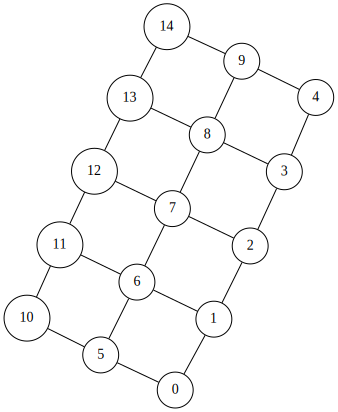

In [6]:
from grape import Graph
from grape import GraphVisualizer

# Write the csv
with open("test.csv", "w") as f:
    for src, dst in generate_lattice([5, 3]):
        f.write("{},{}\n".format(src, dst))

# Load it
graph = Graph.from_csv(
    edge_path="test.csv",
    edge_list_header=False,
    directed=False,
)

# Visualize it!    
GraphVisualizer(graph).plot_dot()

Success!

## Using GRAPE
All this logic is integrated and optimized in GRAPE! for high performance generation. GRAPE additionally add edgetypes depending on the **direction** of the edge!

Let's reproduce the example:

In [7]:
graph = graph.generate_squared_lattice_graph((5, 3))

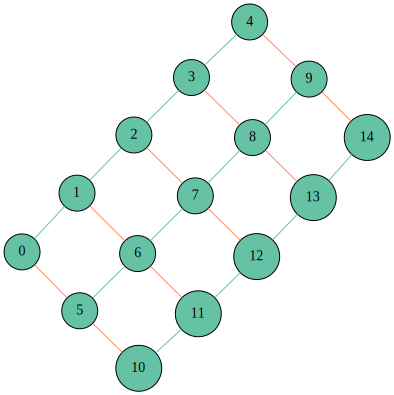

In [8]:
GraphVisualizer(graph).plot_dot()

A 3D lattice!

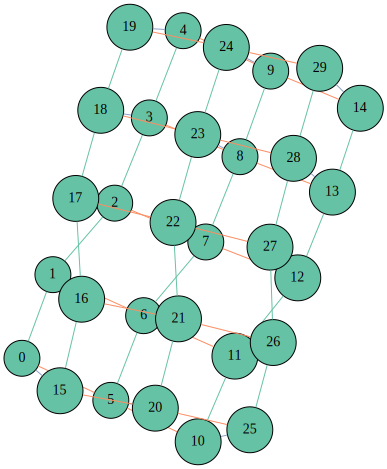

In [9]:
graph = graph.generate_squared_lattice_graph((5, 3, 2))
GraphVisualizer(graph).plot_dot()

A 4D lattice!

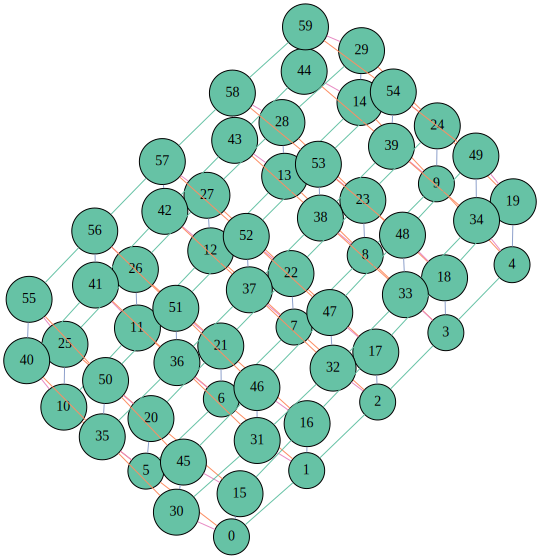

In [10]:
graph = graph.generate_squared_lattice_graph((5, 3, 2, 2))
GraphVisualizer(graph).plot_dot()

### Making them more interesting
A trick I often use to generate more interesting graphs for testing it to introduce "defects" in the cristal!

A quick way to do that is to use holdouts to remove part of the edges, see more on the tutorial [Graph holdouts using 🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape/blob/main/tutorials/Graph_holdouts_using_GRAPE.ipynb).

The idea is that by removing some random edges, we get an almost regular graph which in my experience can often find bugs! 

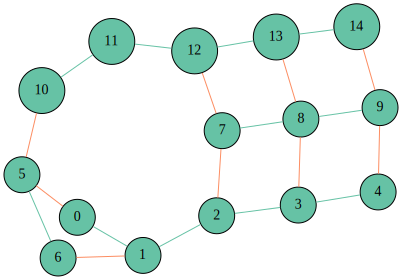

In [11]:
graph = graph.generate_squared_lattice_graph((5, 3))

g1, _ = graph.connected_holdout(0.9, 54)

GraphVisualizer(g1).plot_dot()

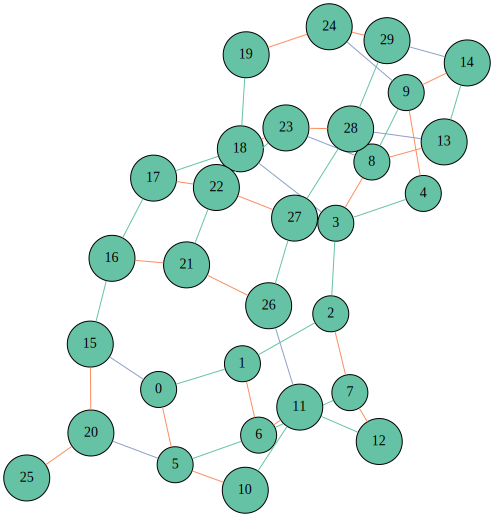

In [12]:
graph = graph.generate_squared_lattice_graph((5, 3, 2))

g1, _ = graph.connected_holdout(0.8, 42)

GraphVisualizer(g1).plot_dot()

## Conclusions

In this tutorial, we learned how we generate lattices and how to use the high-performance implementation [GRAPE](https://github.com/AnacletoLAB/grape). We discussed what is a lattice, and why lattices can be useful.

I hope you now have a better grasp on lattices and how to use GRAPE to generated them to test your algorithms. Do feel free to reach out with any questions or feedback, as I always look for ways to improve this tutorial.

[And remember to ⭐ GRAPE!](https://github.com/AnacletoLAB/grape)